In [1]:
!pip install openpyxl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-02-25 08:36:58--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip’

online+retail.zip       [      <=>           ]  22.62M  15.5MB/s    in 1.5s    

2025-02-25 08:37:00 (15.5 MB/s) - ‘online+retail.zip’ saved [23715478]



In [4]:
!unzip online+retail.zip

Archive:  online+retail.zip
 extracting: Online Retail.xlsx      


In [5]:
import time
stime = time.time()

In [6]:
df1 = pd.read_excel("Online Retail.xlsx", dtype={'InvoiceNo': 'string', 'StockCode': 'string', 'Description': 'string', 'Country': 'string'})
df1.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [7]:
df1.shape

(541909, 8)

In [8]:
df1[df1.InvoiceNo=="C536379"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.5,14527.0,United Kingdom


In [9]:

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


# **Data Cleaning: Handle Missing Values**

In [10]:
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [11]:
df1[df1['Description'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


In [12]:
df1[df1.StockCode=="22139"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311.0,United Kingdom
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.00,NaN,United Kingdom
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2010-12-03 14:27:00,11.02,NaN,United Kingdom
7203,537011,22139,<NA>,-5,2010-12-03 15:38:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
538411,581405,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 13:50:00,4.95,13521.0,United Kingdom
539531,581439,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 16:30:00,10.79,NaN,United Kingdom
540441,581486,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2011-12-09 09:38:00,4.95,17001.0,United Kingdom
541387,581498,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [13]:
df1[df1.StockCode=="22139"].Description.mode()

,Description
0,RETROSPOT TEA SET CERAMIC 11 PC


In [14]:
most_freq = df1[["StockCode","Description"]].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,35833P,check,1
4788,21410,COUNTRY COTTAGE DOORSTOP GREEN,1
4789,21412,VINTAGE GOLD TINSEL REEL,1
4790,21414,SCALLOP SHELL SOAP DISH,1


In [15]:
most_freq[most_freq.StockCode=="85123A"]

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
3300,85123A,CREAM HANGING HEART T-LIGHT HOLDER,9
4620,85123A,wrongly marked carton 22804,1
4658,85123A,?,1


In [16]:
most_freq = most_freq.groupby("StockCode").head(1)
most_freq.head(5)

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638


In [17]:
most_freq[most_freq.StockCode=="85123A"]

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302


In [18]:
most_freq.columns = ["StockCode", "freq_Description", "count"]
most_freq.head(3)

,StockCode,freq_Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159


In [19]:
df2 = df1.merge(most_freq, on="StockCode", how="left")
df2.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0


In [20]:
df2[df2['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom,RETROSPOT TEA SET CERAMIC 11 PC,988.0
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,<NA>,NaN
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,CHRISTMAS CRAFT HEART STOCKING,1.0
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,NEW ENGLAND MUG W GIFT BOX,2.0
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom,DOG TOY WITH PINK CROCHET SKIRT,91.0
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom,HOME SWEET HOME KEY HOLDER,114.0
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom,SET OF 4 ROSE BOTANICAL CANDLES,172.0
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom,SET OF 2 CHRISTMAS DECOUPAGE CANDLE,164.0


In [21]:
df2['Description'] = df2['Description'].mask(df2['Description'].isnull(), df2['freq_Description'])
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,112
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
freq_Description,112
count,112


In [22]:
df2.dropna(subset=['Description'], inplace=True)
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,134968
Country,0
freq_Description,0
count,0


In [23]:
df2.drop(columns = ["freq_Description", "count"], inplace=True) #After talking to a business manager, we confirmed that it is ok to have null values in CustomerID column

# **Data Cleaning: Handle Invalid Values**

In [24]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541797.000000,541797,541797.000000,406829.000000
mean,9.555919,2011-07-04 14:06:48.671255296,4.612067,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:36:00,1.250000,13953.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:41:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.103428,NaN,96.769831,1713.600303


# Quanity and UnitPrice contains negative values. We need to fix it

In [25]:
df2[df2.Quantity<=0].shape

(10527, 8)

In [26]:
df2[df2.UnitPrice<=0].shape

(2405, 8)

In [27]:
# Remove negative or zero quantities and prices
df3 = df2[(df2['Quantity'] > 0) & (df2['UnitPrice'] > 0)]
df3.describe()


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


**We can notice HUGE values in both Quantity and UnitPrice. Let us use quantile to remove those big values (outliers)**

In [28]:
df3.Quantity.quantile(0.9999) #For now, we are not going to worry about extreme values because these can be legitimate values

1439.8763999990188

# Feature Engineering: Create New Columns

In [29]:
df3.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [30]:
df4 = df3.copy()

df4['TotalSales'] = df4['Quantity'] * df4['UnitPrice']
df4.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [31]:
df4['Month'] = df4['InvoiceDate'].dt.month
df4.sample(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
252254,559106,M,Manual,2,2011-07-06 11:10:00,7.95,15889.0,United Kingdom,15.9,7
85465,543470,21080,SET/20 RED RETROSPOT PAPER NAPKINS,12,2011-02-08 14:58:00,0.85,16951.0,United Kingdom,10.2,2


In [32]:
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


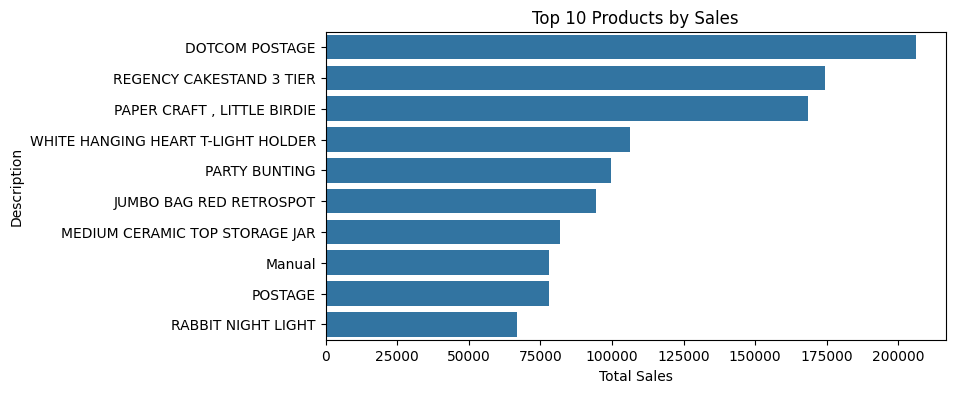

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 Products by Sales
product_sales = df4.groupby('Description')['TotalSales'].sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(8, 4))
sns.barplot(x=product_sales.values, y=product_sales.index)
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.show()

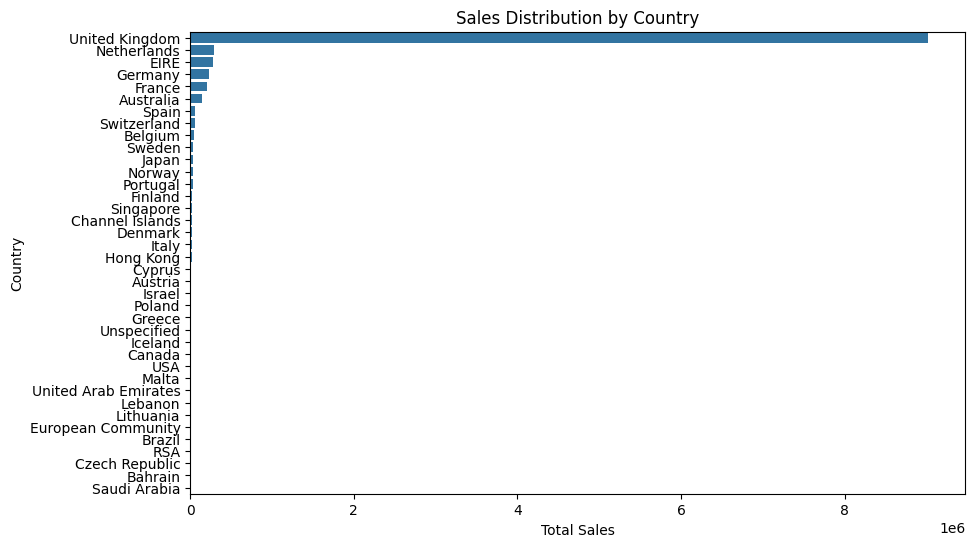

In [34]:
# Sales Distribution by Country
country_sales = df4.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_sales.values, y=country_sales.index)
plt.title('Sales Distribution by Country')
plt.xlabel('Total Sales')
plt.show()

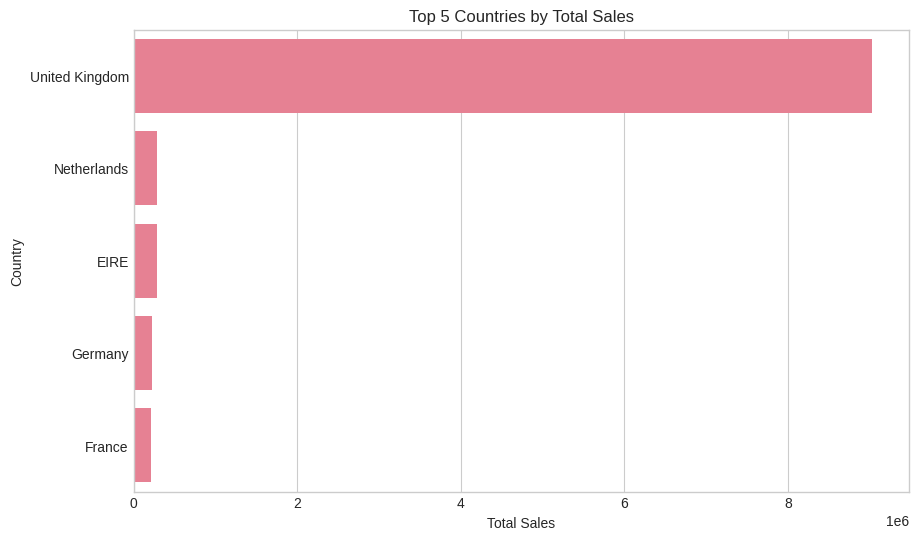

In [35]:
# prompt: I want bar grapgh top 5 country on Total sales

# Assuming df4 is your DataFrame as defined in the previous code.
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Sales Distribution by Country (Top 5)
country_sales = df4.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_sales.values, y=country_sales.index)
plt.title('Top 5 Countries by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()


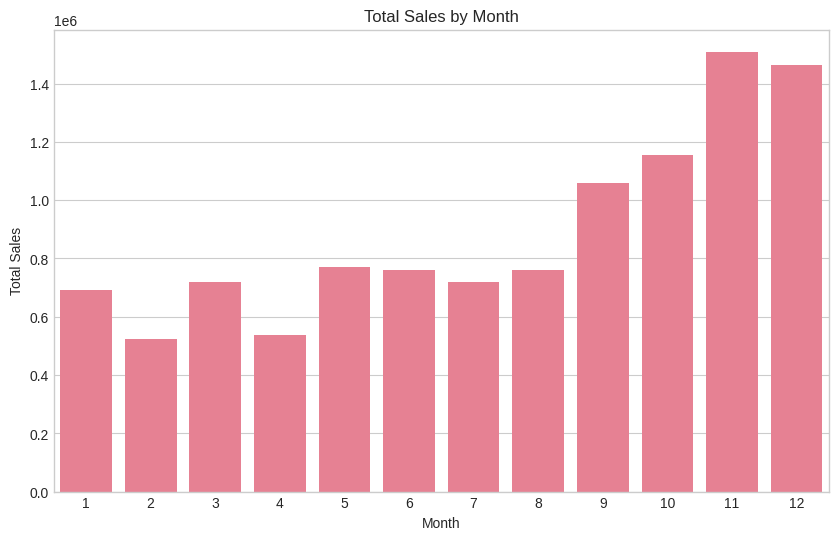

In [36]:
# prompt: # Bar Graph of Sales by Month
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Bar Graph of Sales by Month
monthly_sales = df4.groupby('Month')['TotalSales'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


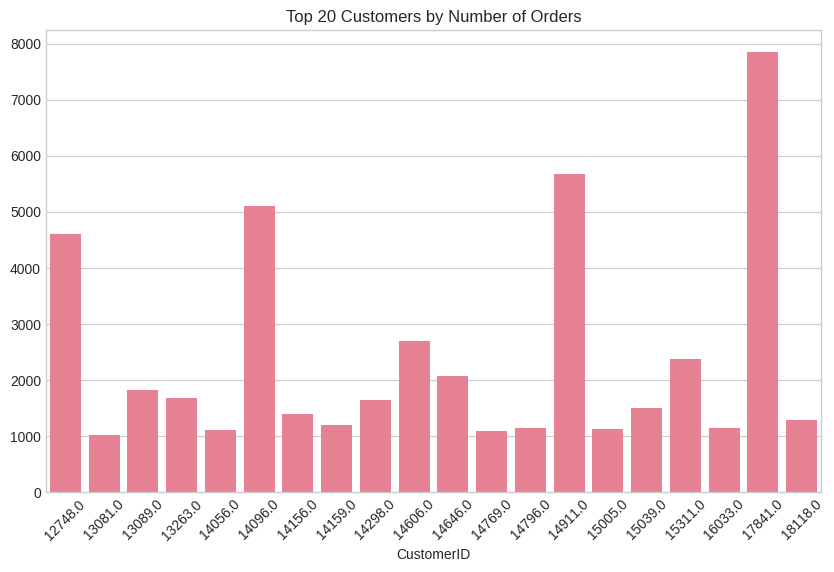

In [37]:
# Customer Purchase Patterns
customer_orders = df4.groupby('CustomerID').size().sort_values(ascending=False).iloc[:20]
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_orders.index, y=customer_orders.values)
plt.title('Top 20 Customers by Number of Orders')
plt.xticks(rotation=45)
plt.show()


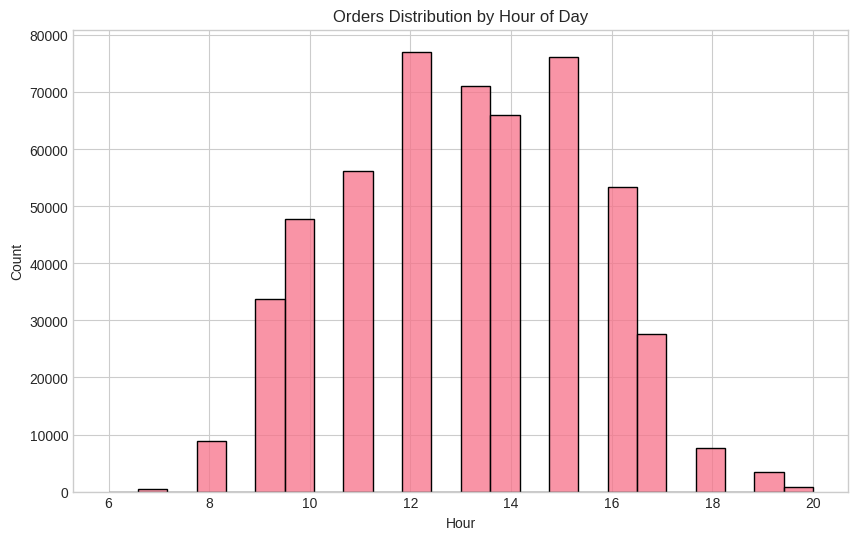

In [38]:
# Orders Distribution by Hour of Day
df4['Hour'] = pd.to_datetime(df4['InvoiceDate']).dt.hour
plt.figure(figsize=(10, 6))
sns.histplot(data=df4, x='Hour', bins=24)
plt.title('Orders Distribution by Hour of Day')
plt.show()


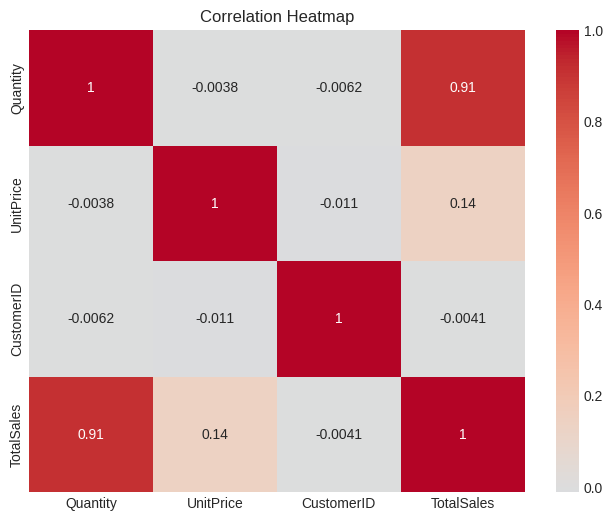

In [39]:
# Correlation Heatmap
numeric_cols = df4.select_dtypes(include=['float64', 'int64']).columns
correlation = df4[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


Quantity & TotalSales (0.91): There's a **strong positive correlation** between the **quantity of items sold and total sales**, which makes sense—selling more items generally increases total sales.

UnitPrice & TotalSales (0.14): A **weak positive correlation** suggests that higher** unit prices have a slight impact on total sales **but aren't the primary driver.

CustomerID has almost no correlation with other variables, as expected, since it serves as an identifier rather than a numerical value tied to sales metrics.

Quantity & UnitPrice (-0.0038): There's a near-zero correlation, indicating that the number of items sold doesn't depend on the unit price in this dataset.

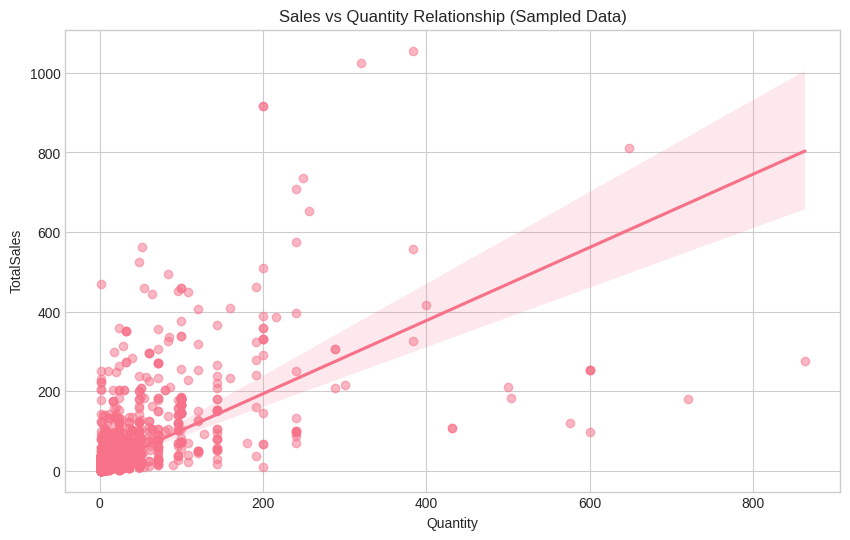

In [40]:
# # Sales vs Quantity Relationship
df_sample = df4.sample(n=10000, random_state=42)
plt.figure(figsize=(10, 6))
sns.regplot(data=df_sample, x='Quantity', y='TotalSales', scatter_kws={'alpha': 0.5})
plt.title('Sales vs Quantity Relationship (Sampled Data)')
plt.show()

<ipython-input-41-78ad8cfe2a07>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantity_sales = df.groupby('Quantity_Bins')['TotalSales'].sum()


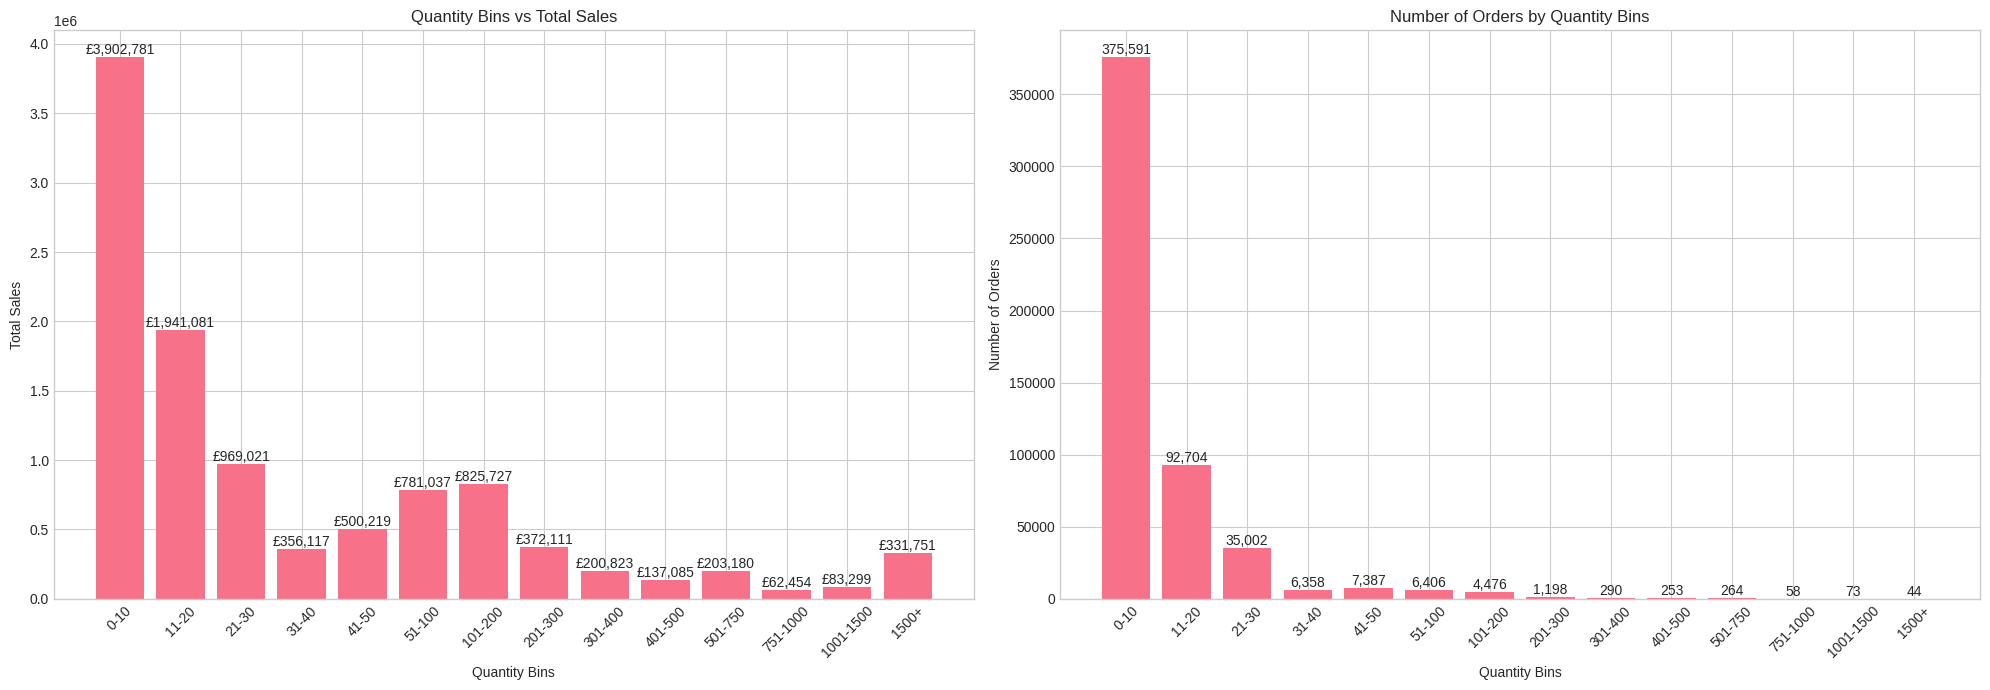


Summary Statistics for Each Bin:
               TotalSales                  Quantity             
                      sum     mean   count     mean   min    max
Quantity_Bins                                                   
0-10           3902780.65    10.39  375591     2.72     1      9
11-20          1941080.77    20.94   92704    11.88    10     19
21-30           969021.30    27.68   35002    23.59    20     29
31-40           356117.43    56.01    6358    34.17    30     39
41-50           500218.77    67.72    7387    46.70    40     49
51-100          781036.89   121.92    6406    74.24    50     99
101-200         825726.65   184.48    4476   125.35   100    199
201-300         372110.93   310.61    1198   234.30   200    291
301-400         200822.54   692.49     290   334.15   300    396
401-500         137084.61   541.84     253   440.71   400    496
501-750         203180.23   769.62     264   607.06   500    744
751-1000         62453.96  1076.79      58   875.45   75

<ipython-input-41-78ad8cfe2a07>:57: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby('Quantity_Bins').agg({


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define more granular bins
bins = [0, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 750, 1000, 1500, float('inf')]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-100',
          '101-200', '201-300', '301-400', '401-500', '501-750',
          '751-1000', '1001-1500', '1500+']

# Create quantity bins
df4['Quantity_Bins'] = pd.cut(df4['Quantity'], bins=bins, labels=labels, right=False)

# Create two analyses
def plot_quantity_analysis(df):
    # 1. Total Sales by Quantity Bins
    plt.figure(figsize=(20, 7))
    quantity_sales = df.groupby('Quantity_Bins')['TotalSales'].sum()

    # Bar plot
    plt.subplot(1, 2, 1)
    bars = plt.bar(range(len(quantity_sales)), quantity_sales.values)
    plt.xlabel('Quantity Bins')
    plt.ylabel('Total Sales')
    plt.title('Quantity Bins vs Total Sales')
    plt.xticks(range(len(quantity_sales)), quantity_sales.index, rotation=45)

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'£{height:,.0f}',
                ha='center', va='bottom', rotation=0)

    # 2. Number of Orders by Quantity Bins
    plt.subplot(1, 2, 2)
    quantity_orders = df['Quantity_Bins'].value_counts().sort_index()
    bars = plt.bar(range(len(quantity_orders)), quantity_orders.values)
    plt.xlabel('Quantity Bins')
    plt.ylabel('Number of Orders')
    plt.title('Number of Orders by Quantity Bins')
    plt.xticks(range(len(quantity_orders)), quantity_orders.index, rotation=45)

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:,.0f}',
                ha='center', va='bottom', rotation=0)

    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print("\nSummary Statistics for Each Bin:")
    summary = df.groupby('Quantity_Bins').agg({
        'TotalSales': ['sum', 'mean', 'count'],
        'Quantity': ['mean', 'min', 'max']
    }).round(2)

    print(summary)

# Call the function
plot_quantity_analysis(df4)

# **Data Visualization and Insights**

## 1. Plot Monthly Total Sales Trend

In [42]:
monthly_sales = df4.groupby('Month')['TotalSales'].sum()
monthly_sales

,TotalSales
Month,
1,691364.560
2,523631.890
3,717639.360
4,537808.621
5,770536.020
6,761739.900
7,719221.191
8,759138.380
9,1058590.172


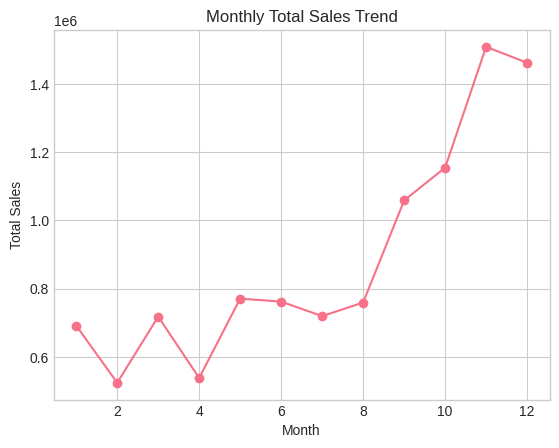

In [43]:
monthly_sales.plot(kind='line', title='Monthly Total Sales Trend', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Top 5 countries based on total sales

In [44]:
df4.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(5)


,TotalSales
Country,
United Kingdom,9025222.084
Netherlands,285446.340
EIRE,283453.960
Germany,228867.140
France,209715.110


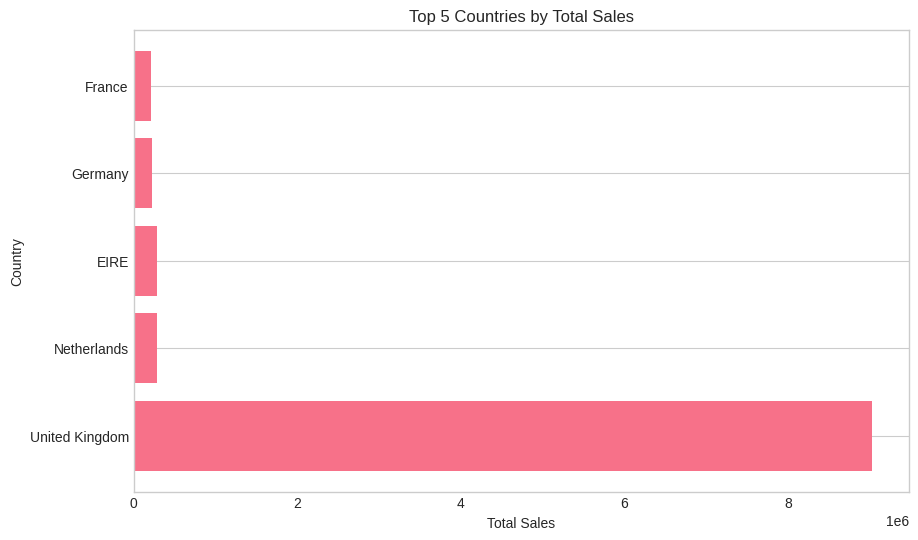

In [45]:
# prompt: plot horizontal bar chart for country wise monthly sales for top 5 countries

import matplotlib.pyplot as plt
top_5_countries = df4.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.barh(top_5_countries.index, top_5_countries.values)
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.title('Top 5 Countries by Total Sales')
plt.grid(axis='x')
plt.show()

Insights

UK has the highest sales (around 9 million)
Netherlands, EIRE, Germany and France are the next 4 countries each having a sales of more than 2 million
Since these countries cover the major sales revenues, we need to pay special attention to customers in these countries and make sure our product quality and service are the best. Also to break dependancy of sales from a single country we can focus on expanding sales in other countries as well

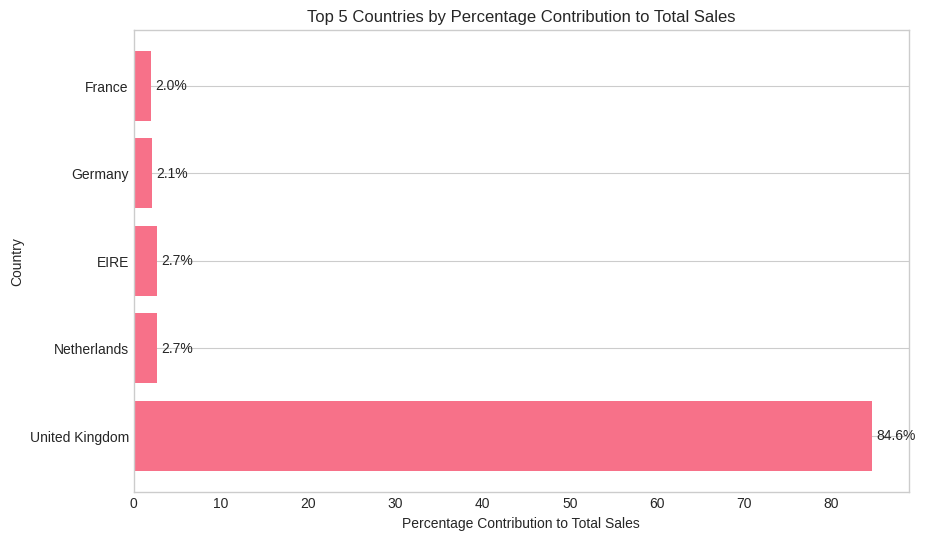

In [46]:
# prompt: Plot same chart as above but this time use percentage contribution. Show % on the bar

import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt


country_wise_sales = df4.groupby('Country')['TotalSales'].sum()
total_sales = country_wise_sales.sum()

top_5_countries = country_wise_sales.sort_values(ascending=False).head(5)
percentages = (top_5_countries / total_sales) * 100

plt.figure(figsize=(10, 6))
bars = plt.barh(top_5_countries.index, percentages)
plt.xlabel('Percentage Contribution to Total Sales')
plt.ylabel('Country')
plt.title('Top 5 Countries by Percentage Contribution to Total Sales')
plt.grid(axis='x')

# Add percentage labels to the bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%', va='center')

plt.show()


# 3. Top 5 products based on total sales

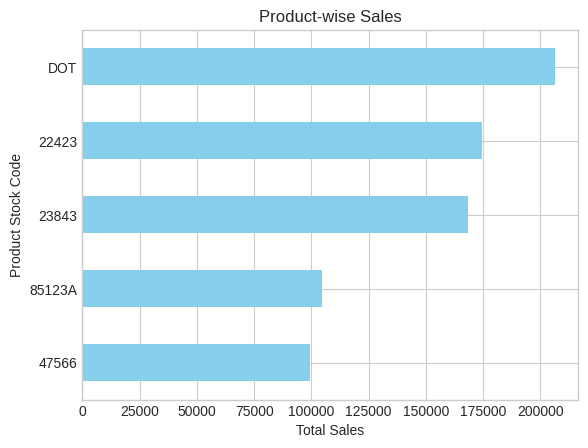

In [47]:
product_wise_sales = df4.groupby('StockCode')['TotalSales'].sum()

top_5_products = product_wise_sales.sort_values(ascending=False).head(5)
top_5_products.plot(kind='barh', color='skyblue')
plt.title('Product-wise Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Stock Code')
plt.gca().invert_yaxis()
plt.show()


In [48]:
product_wise_sales.sort_values(ascending=False)

,TotalSales
StockCode,
DOT,206248.770
22423,174484.740
23843,168469.600
85123A,104518.800
47566,99504.330
...,...
90084,0.850
21268,0.840
51014c,0.830


In [49]:
product_wise_sales.sum()

10666684.544

In [50]:
df4[df4.StockCode=="DOT"].Description.iloc[0]

'DOTCOM POSTAGE'

In [51]:
for stock_code in top_5_products.index:
    description = df4[df4.StockCode==stock_code].Description.iloc[0]
    print(f"{stock_code} ==> {description}")

DOT ==> DOTCOM POSTAGE
22423 ==> REGENCY CAKESTAND 3 TIER
23843 ==> PAPER CRAFT , LITTLE BIRDIE
85123A ==> WHITE HANGING HEART T-LIGHT HOLDER
47566 ==> PARTY BUNTING


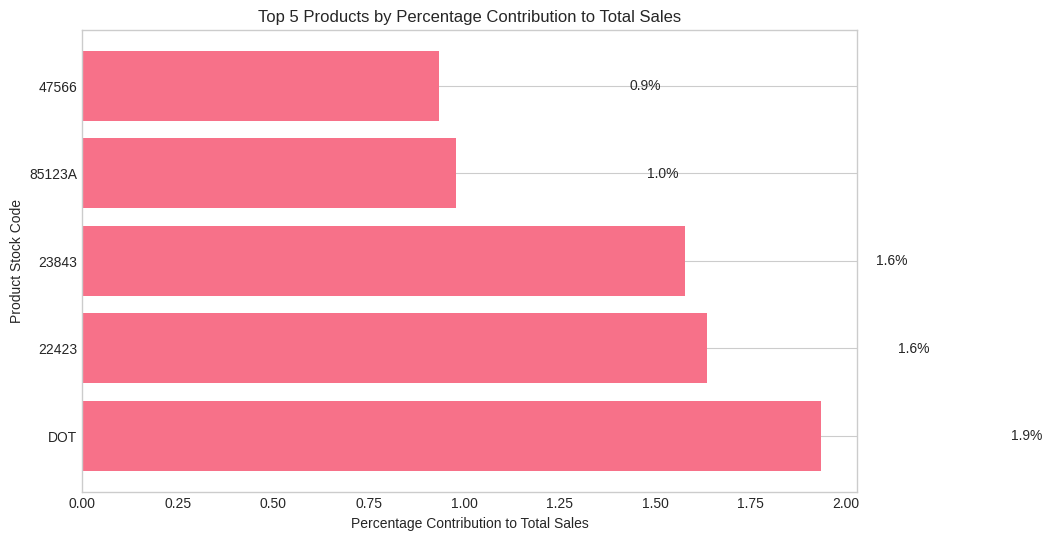

In [52]:
# prompt: Plot same chart as above for product sales but use percentage this time. Show % on the bar

# Assuming df4 is already created from the previous code
total_sales = product_wise_sales.sum()
percentages = (top_5_products / total_sales) * 100

plt.figure(figsize=(10, 6))
bars = plt.barh(top_5_products.index, percentages)
plt.xlabel('Percentage Contribution to Total Sales')
plt.ylabel('Product Stock Code')
plt.title('Top 5 Products by Percentage Contribution to Total Sales')
plt.grid(axis='x')

# Add percentage labels to the bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%', va='center')

plt.show()

# **4. RFM Analysis (Recency, Frequency, Monetary)**

In [53]:
df4['InvoiceDate'].max()


Timestamp('2011-12-09 12:50:00')

In [54]:
current_date = df4['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df4.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSales': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [55]:
rfm.describe()


,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,92.536422,91.720609,2054.266460
std,100.014169,228.785094,8989.230441
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,307.415000
50%,51.000000,41.000000,674.485000
75%,142.000000,100.000000,1661.740000
max,374.000000,7847.000000,280206.020000


In [56]:
# Segment Customers based on RFM
rfm['R_Segment'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Segment'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_Segment'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])
rfm['RFM_Score'] = rfm[['R_Segment', 'F_Segment', 'M_Segment']].sum(axis=1)

In [57]:
rfm.sample(5)

#The RFM (Recency, Frequency, Monetary) model helps in segmenting customers based on their purchasing behavior:


# Recency (R): How recently a customer made a purchase (lower is better).
# Frequency (F): How often a customer makes a purchase (higher is better).
# Monetary (M): How much a customer spends (higher is better).

#he RFM_Score is the sum of individual R, F, and M segments, where higher scores indicate more engaged and valuable customers.

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
14411.0,311,14,1063.00,1,1,3,5
16527.0,81,14,228.06,2,1,1,4
12612.0,74,19,704.04,2,2,3,7
15671.0,19,78,2657.13,3,3,4,10
13951.0,176,39,674.45,1,2,2,5


<ipython-input-58-df29f82a74a9>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(data=df4.groupby('Hour_Bins')['TotalSales'].sum().reset_index(), x='Hour_Bins', y='TotalSales', palette='viridis')
<ipython-input-58-df29f82a74a9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df4.groupby('Hour_Bins')['TotalSales'].sum().reset_index(), x='Hour_Bins', y='TotalSales', palette='viridis')


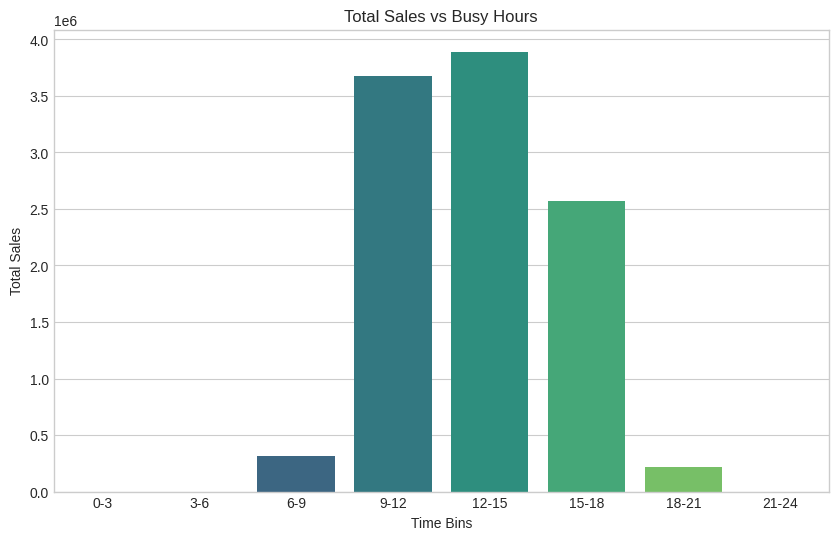

<ipython-input-58-df29f82a74a9>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df4.groupby('Weekday')['TotalSales'].sum().reset_index(), x='Weekday', y='TotalSales', order=weekday_order, palette='magma')


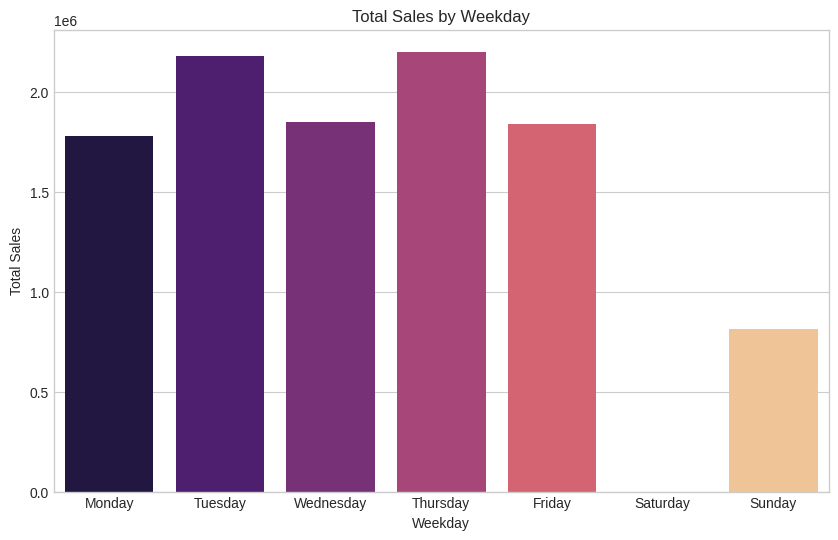

<ipython-input-58-df29f82a74a9>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df4.groupby('Year')['TotalSales'].sum().reset_index(), x='Year', y='TotalSales', palette='coolwarm')


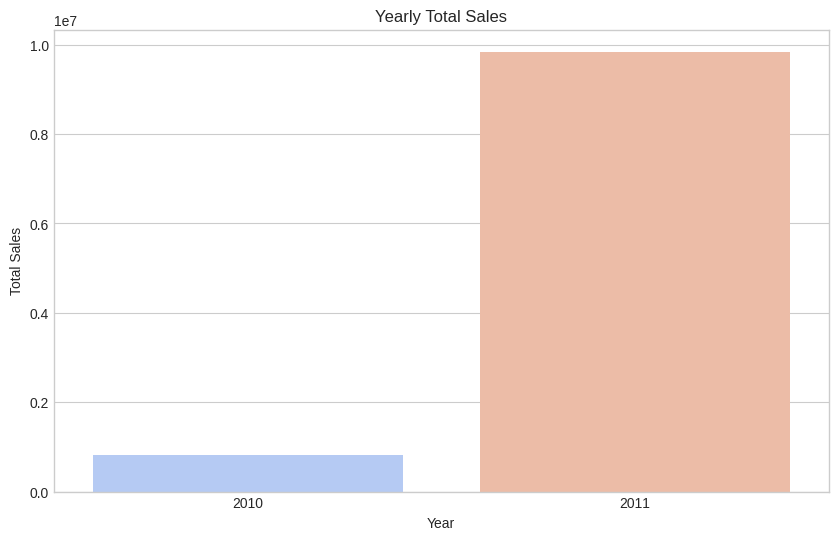

In [58]:
import seaborn as sns

# Assuming df4 is your DataFrame
df4['InvoiceDate'] = pd.to_datetime(df4['InvoiceDate'])

# Extract Weekday, Year, and Hour
df4['Weekday'] = df4['InvoiceDate'].dt.day_name()
df4['Year'] = df4['InvoiceDate'].dt.year
df4['Date'] = df4['InvoiceDate'].dt.date
df4['Week'] = df4['InvoiceDate'].dt.isocalendar().week

# Time Bins for Busy Hours (12-3, 3-6, etc.)
bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]
labels = ['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-24']
df4['Hour_Bins'] = pd.cut(df4['InvoiceDate'].dt.hour, bins=bins, labels=labels, right=False)


# Total Sales vs Busy Hours
plt.figure(figsize=(10, 6))
sns.barplot(data=df4.groupby('Hour_Bins')['TotalSales'].sum().reset_index(), x='Hour_Bins', y='TotalSales', palette='viridis')
plt.title('Total Sales vs Busy Hours')
plt.xlabel('Time Bins')
plt.ylabel('Total Sales')
plt.show()

# Total Sales by Weekday
plt.figure(figsize=(10, 6))
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data=df4.groupby('Weekday')['TotalSales'].sum().reset_index(), x='Weekday', y='TotalSales', order=weekday_order, palette='magma')
plt.title('Total Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Sales')
plt.show()

# Year vs Total Sales
plt.figure(figsize=(10, 6))
sns.barplot(data=df4.groupby('Year')['TotalSales'].sum().reset_index(), x='Year', y='TotalSales', palette='coolwarm')
plt.title('Yearly Total Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

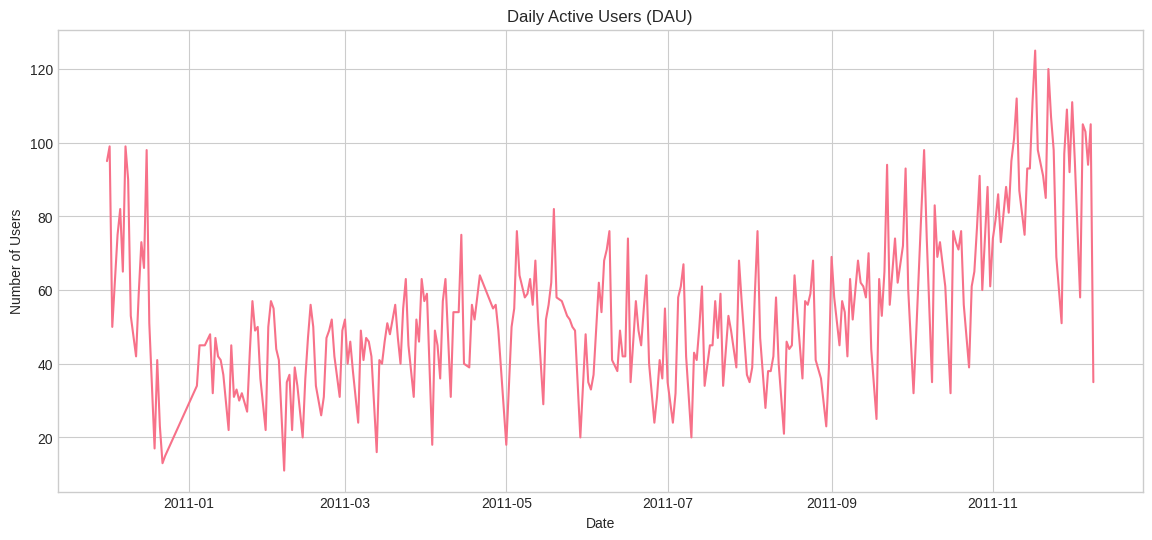

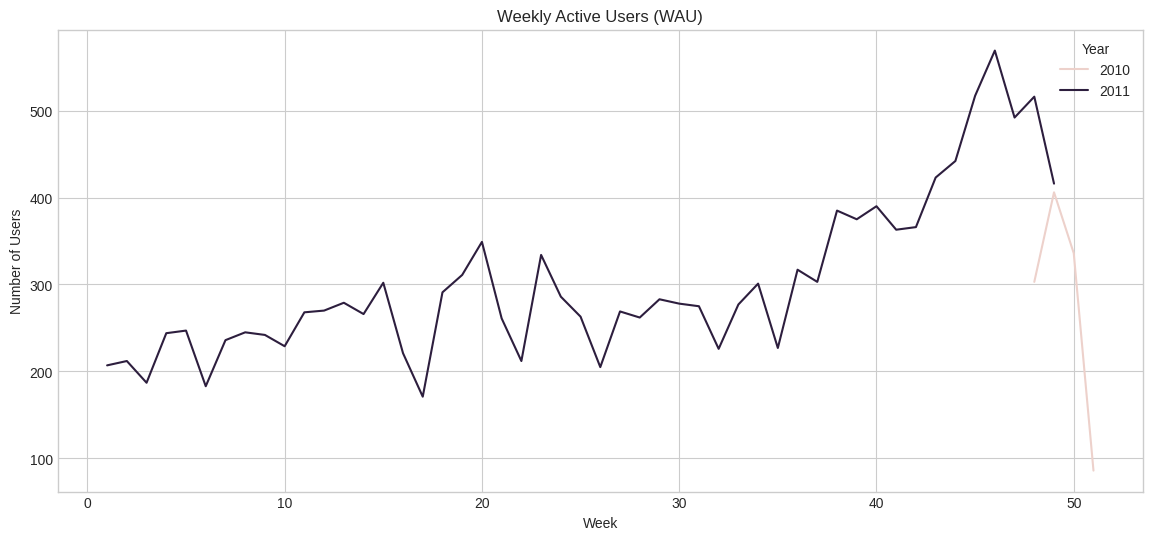

In [59]:
# DAU, WAU, MAU Calculations
dau = df4.groupby('Date')['CustomerID'].nunique().reset_index(name='DAU')
wau = df4.groupby(['Year', 'Week'])['CustomerID'].nunique().reset_index(name='WAU')


# DAU Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=dau, x='Date', y='DAU')
plt.title('Daily Active Users (DAU)')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.show()

# WAU Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=wau, x='Week', y='WAU', hue='Year')
plt.title('Weekly Active Users (WAU)')
plt.xlabel('Week')
plt.ylabel('Number of Users')
plt.show()

# 5. Customer Churn Analysis

In [60]:
df4.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month,Hour,Quantity_Bins,Weekday,Year,Date,Week,Hour_Bins
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,8,0-10,Wednesday,2010,2010-12-01,48,6-9
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,8,0-10,Wednesday,2010,2010-12-01,48,6-9


In [61]:
# Create a basket matrix for association rule mining
customer_last_purchase = df4.groupby("CustomerID")['InvoiceDate'].max()
customer_last_purchase.head(5)

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:01:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00


In [62]:
type(customer_last_purchase)

pandas.core.series.Series

In [63]:
current_date

Timestamp('2011-12-10 12:50:00')

In [64]:
customer_last_purchase = (current_date - customer_last_purchase).dt.days
customer_last_purchase.head(5)

,InvoiceDate
CustomerID,
12346.0,326
12347.0,2
12348.0,75
12349.0,19
12350.0,310


In [65]:
# Define churn threshold (e.g., 90 days without purchase)
churn_threshold = 90
churned_customers = customer_last_purchase[customer_last_purchase > churn_threshold]
churned_customers.head(5)

,InvoiceDate
CustomerID,
12346.0,326
12350.0,310
12353.0,204
12354.0,232
12355.0,214


Number of Churned Customers: 1449


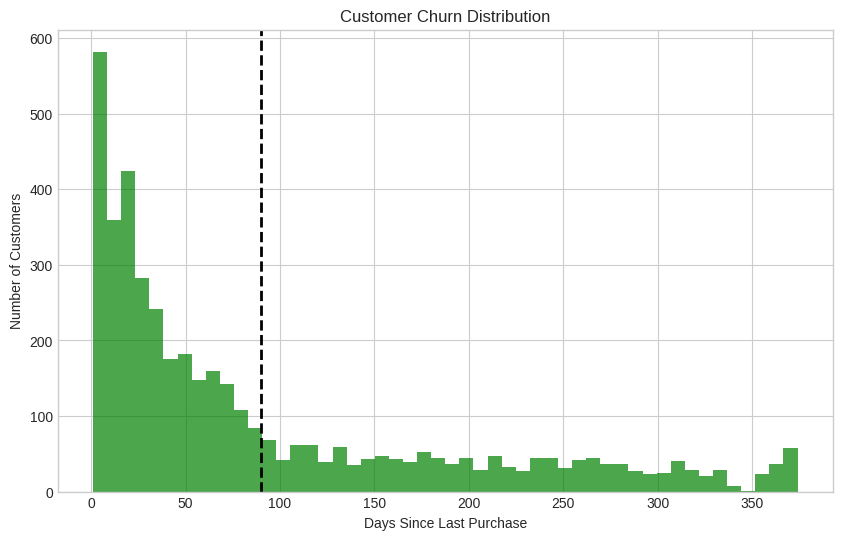

In [66]:
print("Number of Churned Customers:", len(churned_customers))
plt.figure(figsize=(10, 6))
plt.hist(customer_last_purchase, bins=50, color='Green', alpha=0.7)
plt.axvline(churn_threshold, color='black', linestyle='dashed', linewidth=2)
plt.title('Customer Churn Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.show()

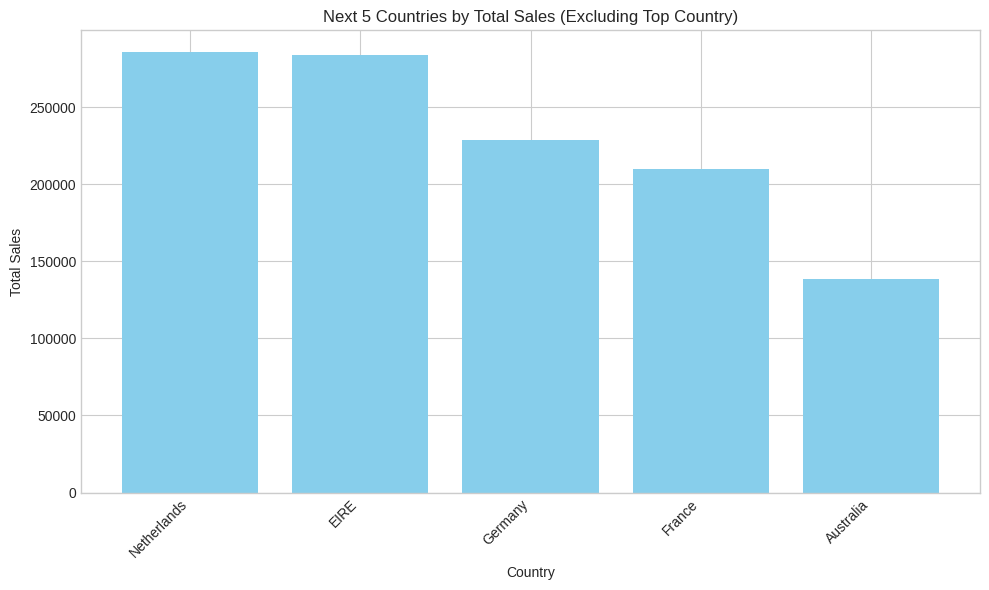

In [67]:
top_6_countries = df4.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(6)

next_5_countries = top_6_countries.iloc[1:6]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(next_5_countries.index, next_5_countries.values, color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Next 5 Countries by Total Sales (Excluding Top Country)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
